In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

In [2]:
file_path = '/workspaces/STdata_prediction/src/ST-graph/input/graph_sensor_locations_bay.csv'

In [3]:
data = pd.read_csv(file_path)
indexes = data['index']
latitudes = data['latitude']
longitudes = data['longitude']

In [4]:
# データを用いた処理の例
# 例えば、経度と緯度を使って距離行列を計算する場合
def euclidean_distance(lat1, lon1, lat2, lon2):
    return ((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2) ** 0.5

num_sensors = len(indexes)
distance_matrix = np.zeros((num_sensors, num_sensors))

for i in range(num_sensors):
    for j in range(num_sensors):
        if i != j:
            distance_matrix[i, j] = euclidean_distance(latitudes[i], longitudes[i], latitudes[j], longitudes[j])

print(distance_matrix)

[[0.         0.11930777 0.00734992 ... 0.0413912  0.04127735 0.05056487]
 [0.11930777 0.         0.11271034 ... 0.09121159 0.08519555 0.06952101]
 [0.00734992 0.11271034 0.         ... 0.03883544 0.03738332 0.04458247]
 ...
 [0.0413912  0.09121159 0.03883544 ... 0.         0.0080898  0.02667732]
 [0.04127735 0.08519555 0.03738332 ... 0.0080898  0.         0.01875761]
 [0.05056487 0.06952101 0.04458247 ... 0.02667732 0.01875761 0.        ]]


In [5]:
# Find the index of the smallest distance (excluding the diagonal)
min_distance = np.inf
min_index = (None, None)

for i in range(num_sensors):
    for j in range(i + 1, num_sensors):  # Start from i+1 to avoid the diagonal
        if distance_matrix[i, j] < min_distance:
            min_distance = distance_matrix[i, j]
            min_index = (i, j)

print(f"The smallest distance is between indexes {min_index[0]} and {min_index[1]} with a distance of {min_distance}")

The smallest distance is between indexes 241 and 245 with a distance of 3.046309242304876e-05


In [6]:
# ファイルのパス
file_path = '/workspaces/STdata_prediction/src/LGnet/input/pems-bay.h5'

# .h5ファイルの読み取り専用モードでの読み込み
with h5py.File(file_path, 'r') as f:
    # データセットのリストを取得
    dataset_list = list(f.keys())
    print("Available datasets:", dataset_list)

    # dfグループ内のデータセットを取得
    df_group = f['speed']
    print(f"\nGroups and datasets in 'df': {list(df_group.keys())}\n")

    # 各データセットの内容を表示
    for key in df_group.keys():
        data = df_group[key][:]
        print(f"Dataset: {key}")
        print(data.shape)
        print("\n")

Available datasets: ['speed']

Groups and datasets in 'df': ['axis0', 'axis1', 'block0_items', 'block0_values']

Dataset: axis0
(325,)


Dataset: axis1
(52116,)


Dataset: block0_items
(325,)


Dataset: block0_values
(52116, 325)




In [7]:
with h5py.File(file_path, 'r') as f:
    # dfグループ内のデータセットを取得
    df_group = f['speed']

    # 各データセットを取得
    axis0 = df_group['axis0'][:]
    axis1 = df_group['axis1'][:]
    block0_items = df_group['block0_items'][:]
    block0_values = df_group['block0_values'][:]

    # DataFrameの作成
    df = pd.DataFrame(block0_values, index=axis1, columns=block0_items)

# DataFrameの表示
print(df.head())

                     400001  400017  400030  400040  400045  400052  400057  \
1483228800000000000    71.4    67.8    70.5    67.4    68.8    66.6    66.8   
1483229100000000000    71.6    67.5    70.6    67.5    68.7    66.6    66.8   
1483229400000000000    71.6    67.6    70.2    67.4    68.7    66.1    66.8   
1483229700000000000    71.1    67.5    70.3    68.0    68.5    66.7    66.6   
1483230000000000000    71.7    67.8    70.2    68.1    68.4    66.9    66.1   

                     400059  400065  400069  ...  409525  409526  409528  \
1483228800000000000    68.0    66.8    69.0  ...    68.8    67.9    68.8   
1483229100000000000    67.8    66.5    68.2  ...    68.4    67.3    68.4   
1483229400000000000    67.8    66.2    67.8  ...    68.4    67.4    68.4   
1483229700000000000    67.7    65.9    67.8  ...    68.5    67.5    68.5   
1483230000000000000    67.7    66.1    67.8  ...    68.5    67.7    68.5   

                     409529  413026  413845  413877  413878  414284 

In [8]:
def plot_graph(speed_values, start_index, end_index):
    plt.figure(figsize=(12, 8))
    indices = np.arange(speed_values.shape[0])
    colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用

    for i, idx in enumerate(range(start_index, end_index + 1)):
        if idx < speed_values.shape[1]:  # Ensure the index is within bounds
            values_index = speed_values.iloc[:, idx].values
            plt.plot(indices, values_index, linestyle='-', label=f'Values at Index {idx}', 
                     color=colors(i), alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Values from Index {start_index} to {end_index}')
    #plt.legend()
    plt.grid(True)
    plt.ylim(0, 100)
    plt.show()

/workspaces/STdata_prediction/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/tmp/ipykernel_41199/1594252672.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用


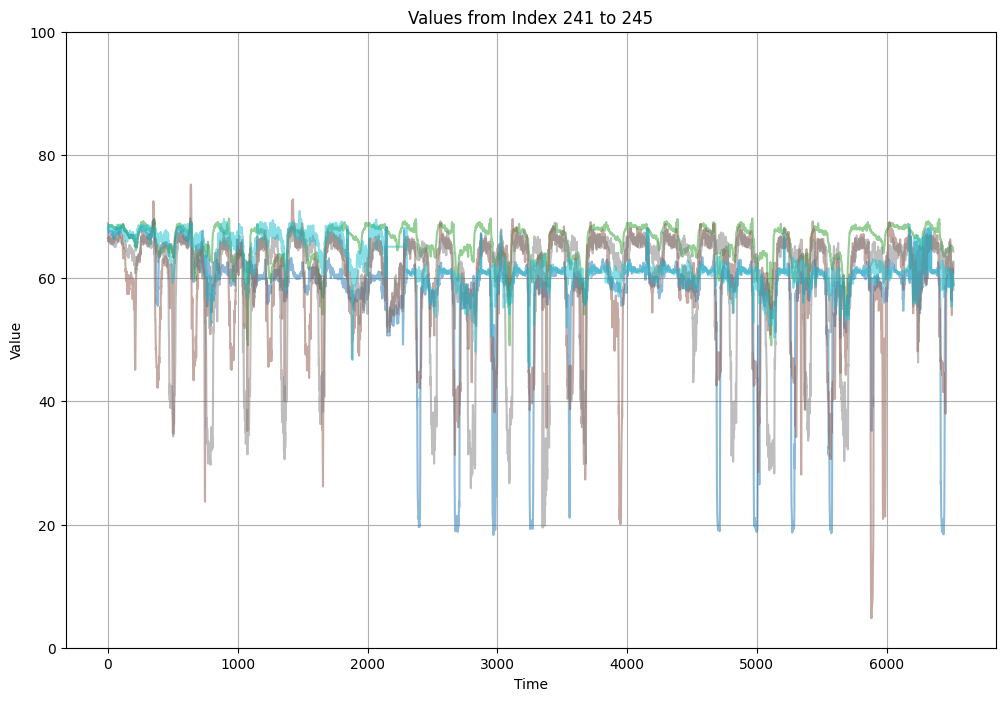

In [9]:
plot_graph(np.array_split(df, 8)[0], 241, 245)

In [10]:
from scipy.cluster.hierarchy import linkage, fcluster

# クラスタリングの実行
# 'ward'法はクラスタ間の分散が最小となるようにクラスタを結合する方法です
Z = linkage(distance_matrix, method='ward')

# クラスタ数を決定 (例: 2クラスタ)
num_clusters = 25
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# クラスタリング結果の表示
for i in range(num_clusters):
    cluster_indices = np.where(clusters == i + 1)[0]
    print(f"Cluster {i + 1}: {cluster_indices}")


Cluster 1: [ 32  92 172 173 194 195 239 252 286 290 293 294 295 296 298 303 304 306
 307 308]
Cluster 2: [ 22  27 119 156 157 178 179 180 183 291 301]
Cluster 3: [ 61  75 189 224 225 247 249 287 288 289 292 297 299 300 302 305 309]
Cluster 4: [ 51  76  80 103 146 188]
Cluster 5: [ 25  45  84  93 107 109 122 133 187 218 219 220 221 222 223 248 250 251]
Cluster 6: [ 13  23  38  49 120 138 153 154 199 209 210 319 320]
Cluster 7: [ 14  17  30  64  79 135]
Cluster 8: [  9  31  40  54  55 121 186 246]
Cluster 9: [  7  21  52  96  98 101 104 106]
Cluster 10: [  1  10  33  39  46  62  67  69  86  94 100 108 112 115 123 127 228]
Cluster 11: [ 11  29  70  71  85  91 113 114 143 144]
Cluster 12: [48 58 60 77]
Cluster 13: [ 15  35  81 129 238 240]
Cluster 14: [  6  73  99 102 128 147 149 164 310 311 312 313]
Cluster 15: [ 16  34  50 141 142 145 235 236 237 257 324]
Cluster 16: [  0   2   4  18  19  56  68 126 132 134 151 158 160 216 217 253 254]
Cluster 17: [ 20  41  53  72  97 191 192 193 197 198

/tmp/ipykernel_41199/1809888641.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


In [11]:
def plot_graphs_by_cluster(speed_values, clusters, num_clusters):
    indices = np.arange(speed_values.shape[0])
    colors = plt.cm.get_cmap('tab10', speed_values.shape[1])  # カラーマップを使用

    for cluster in range(1, num_clusters + 1):
        plt.figure(figsize=(12, 8))
        cluster_indices = np.where(clusters == cluster)[0]
        
        for idx in cluster_indices:
            values_index = speed_values.iloc[:, idx].values
            plt.plot(indices, values_index, linestyle='-', 
                     label=f'Index {idx}', 
                     color=colors(idx), alpha=0.5)

        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title(f'Cluster {cluster} Values')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 100)
        plt.show()

/workspaces/STdata_prediction/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/tmp/ipykernel_41199/889443620.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', speed_values.shape[1])  # カラーマップを使用


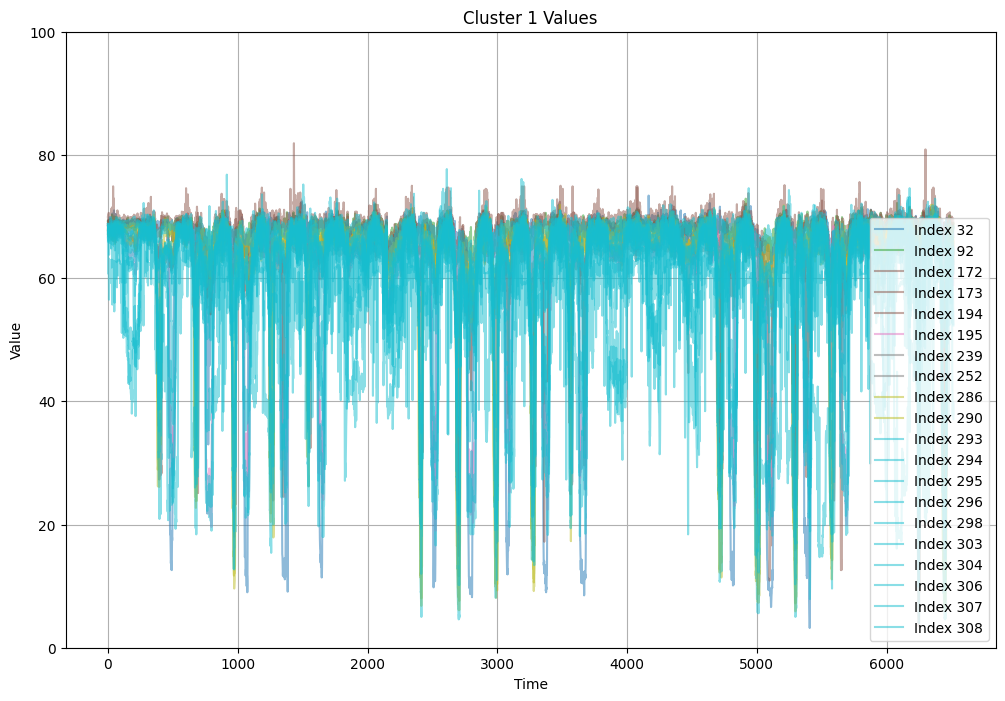

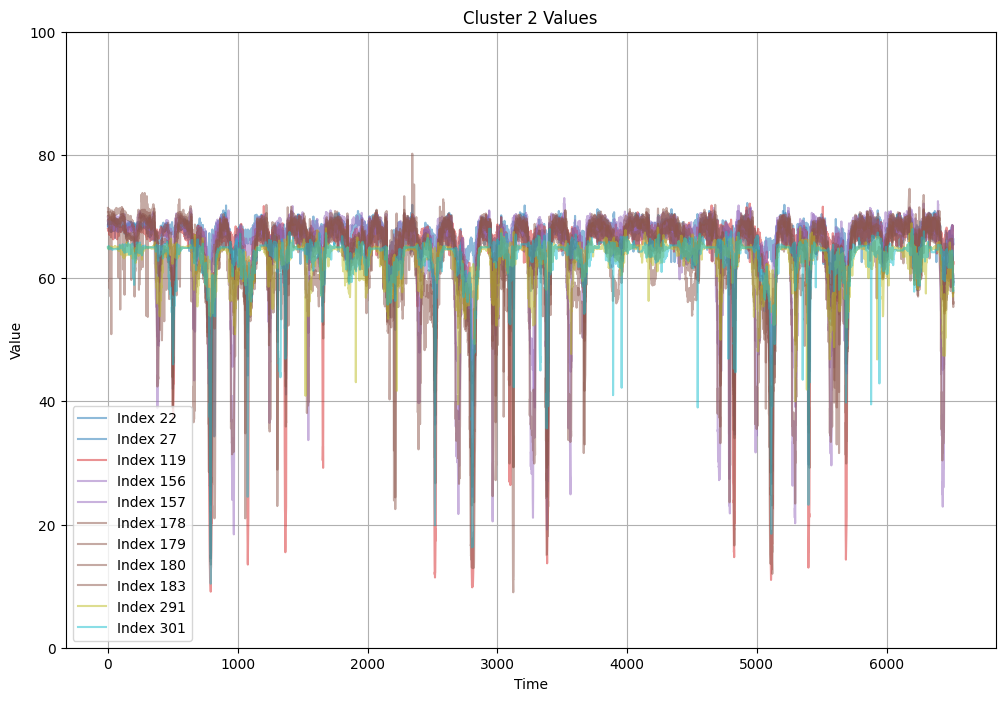

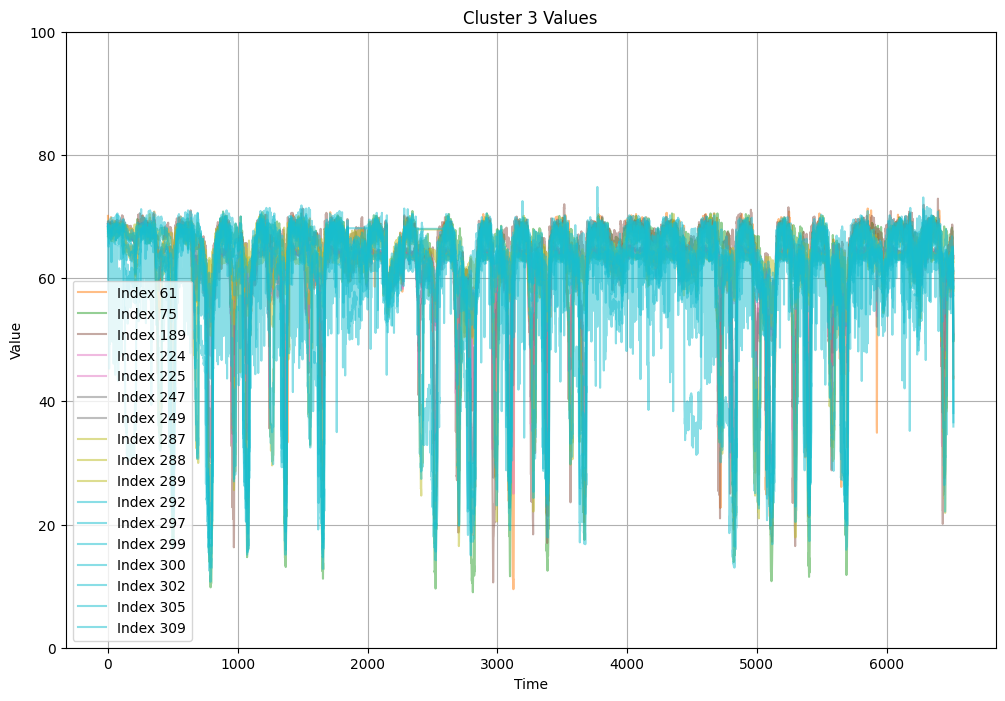

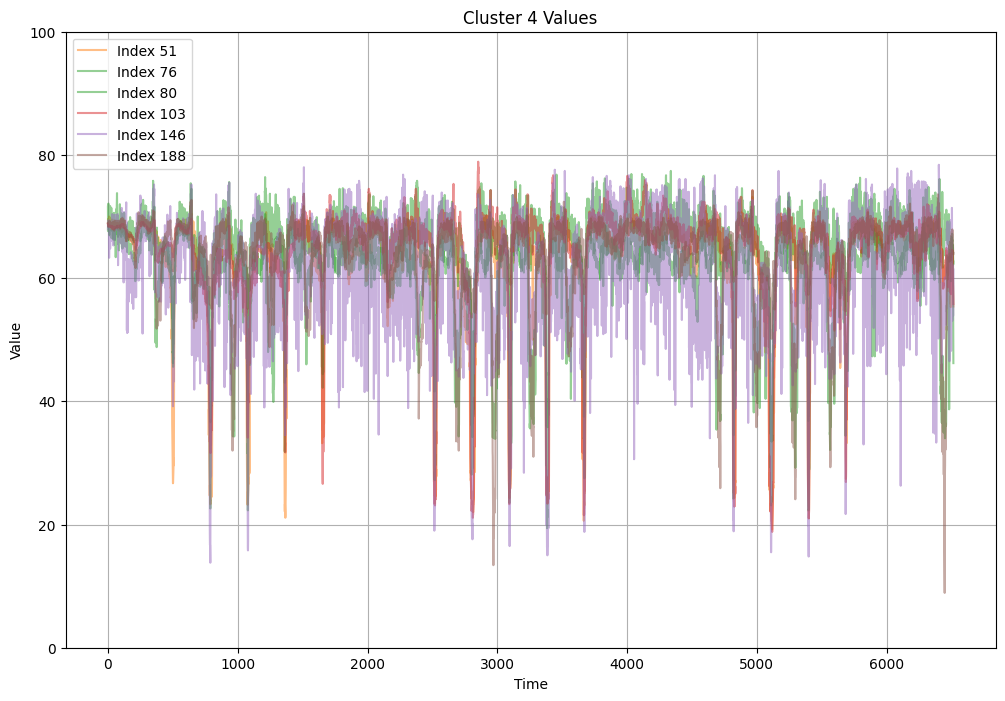

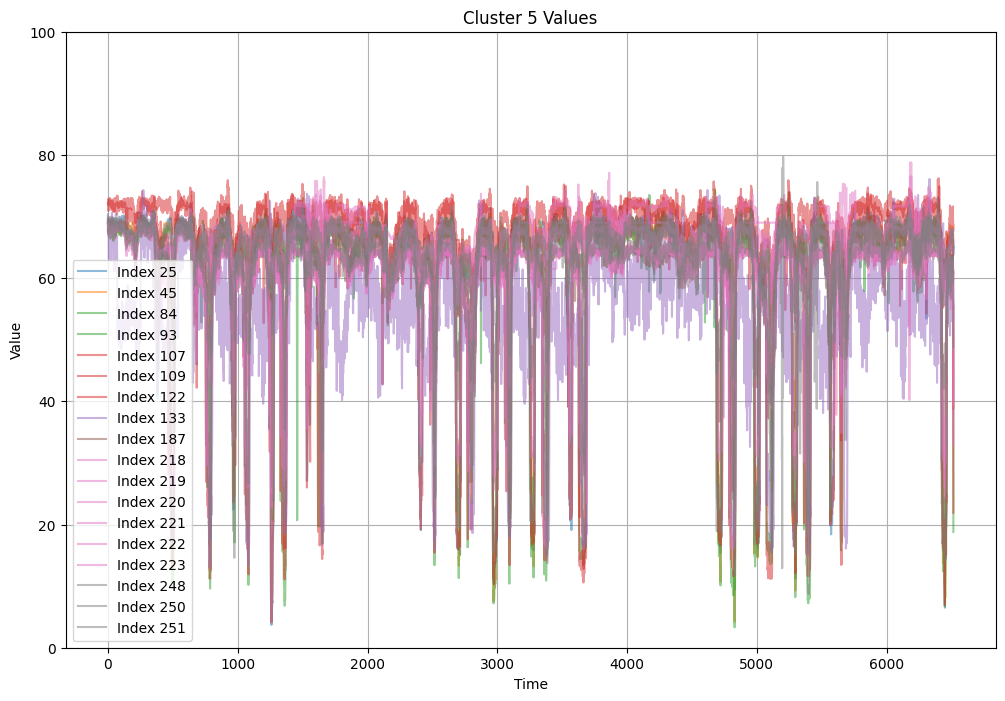

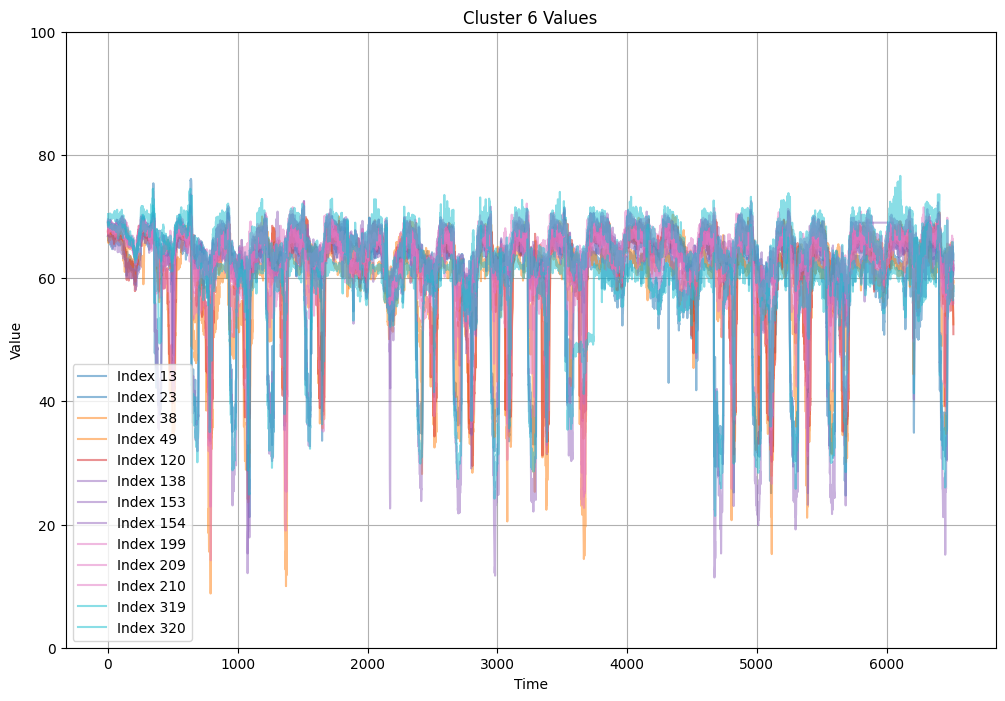

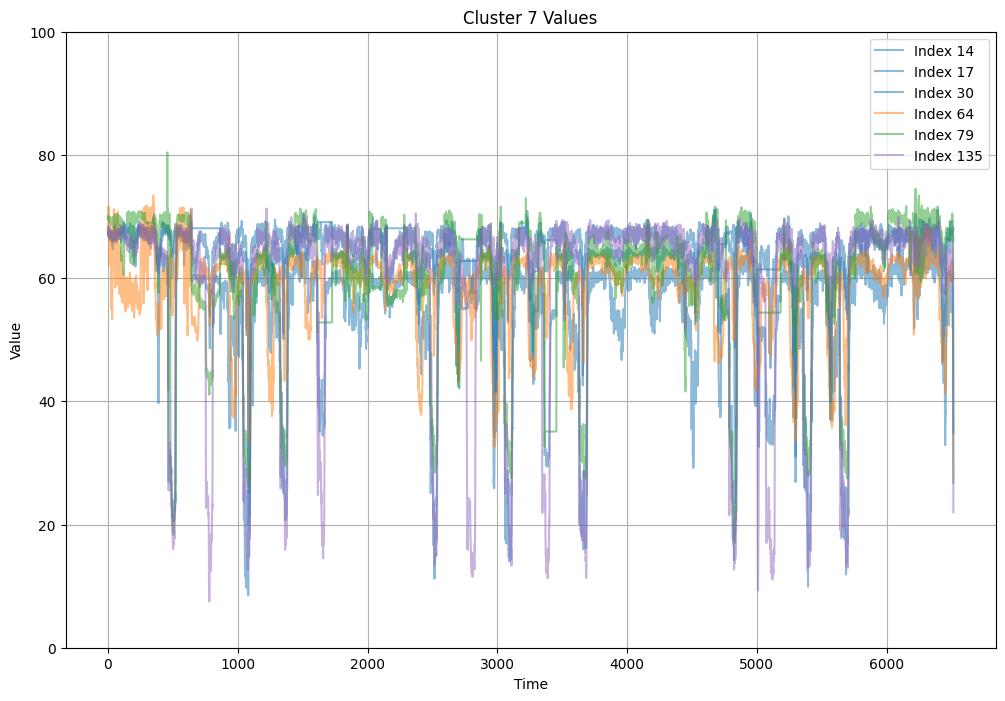

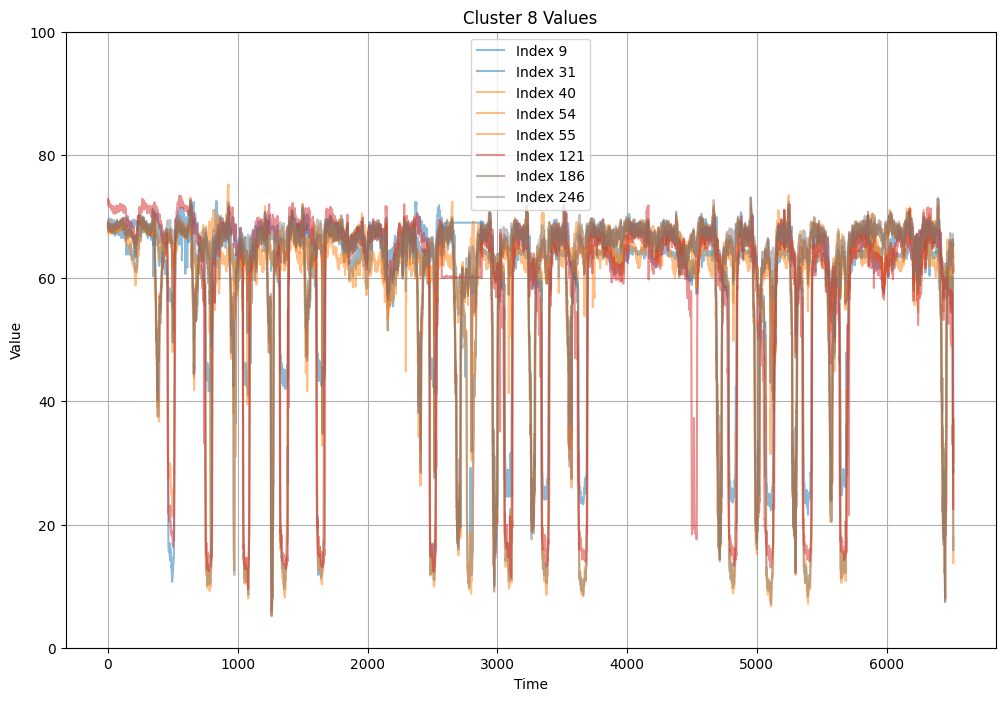

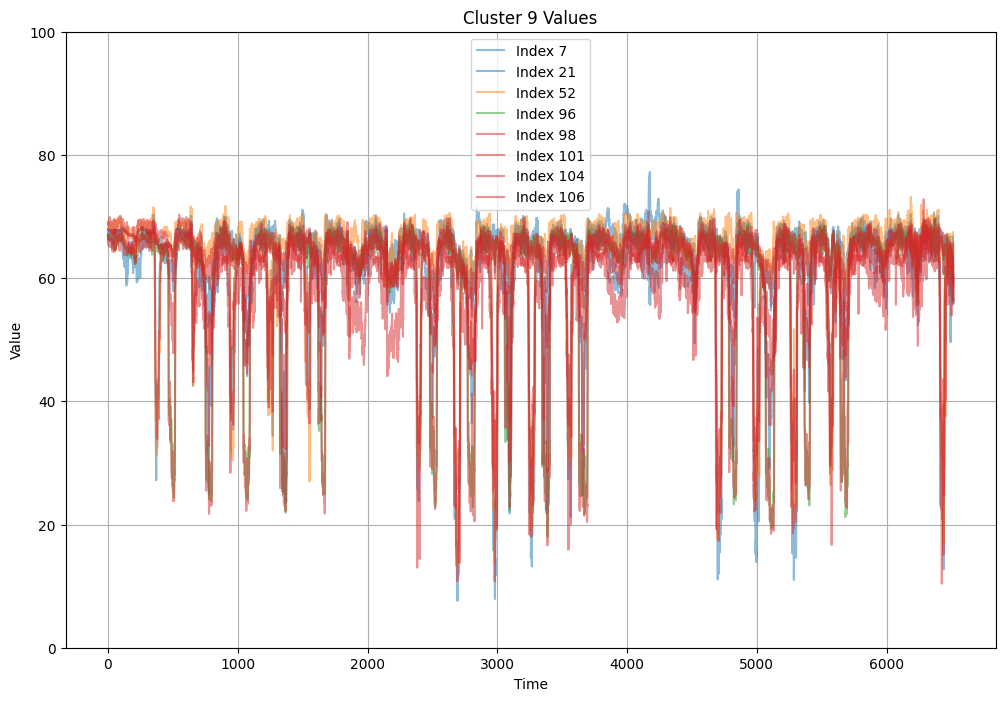

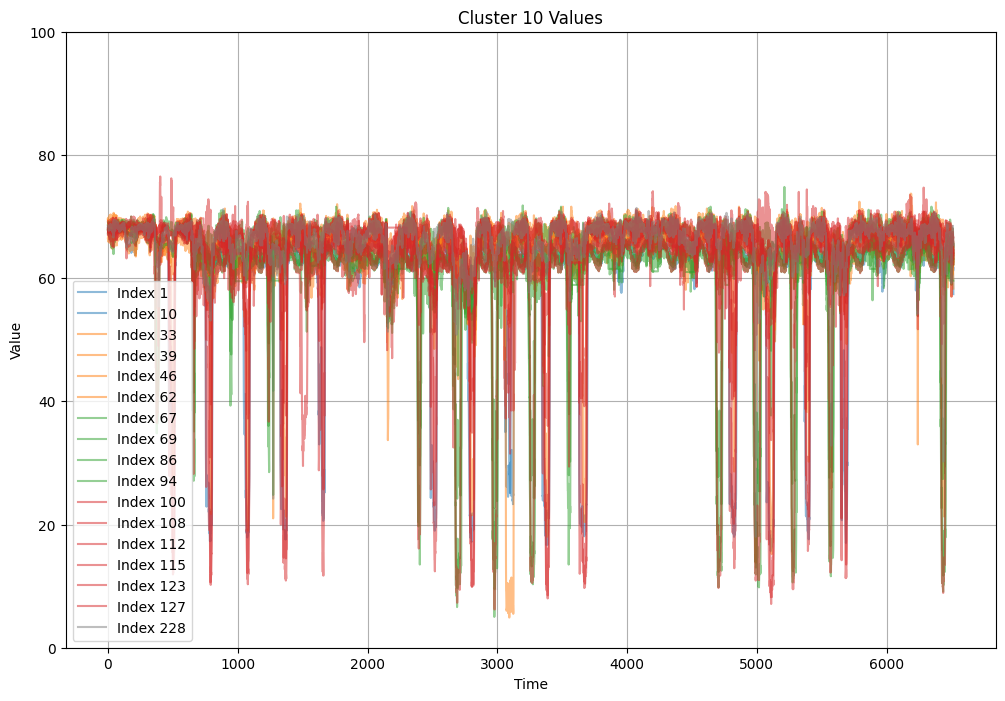

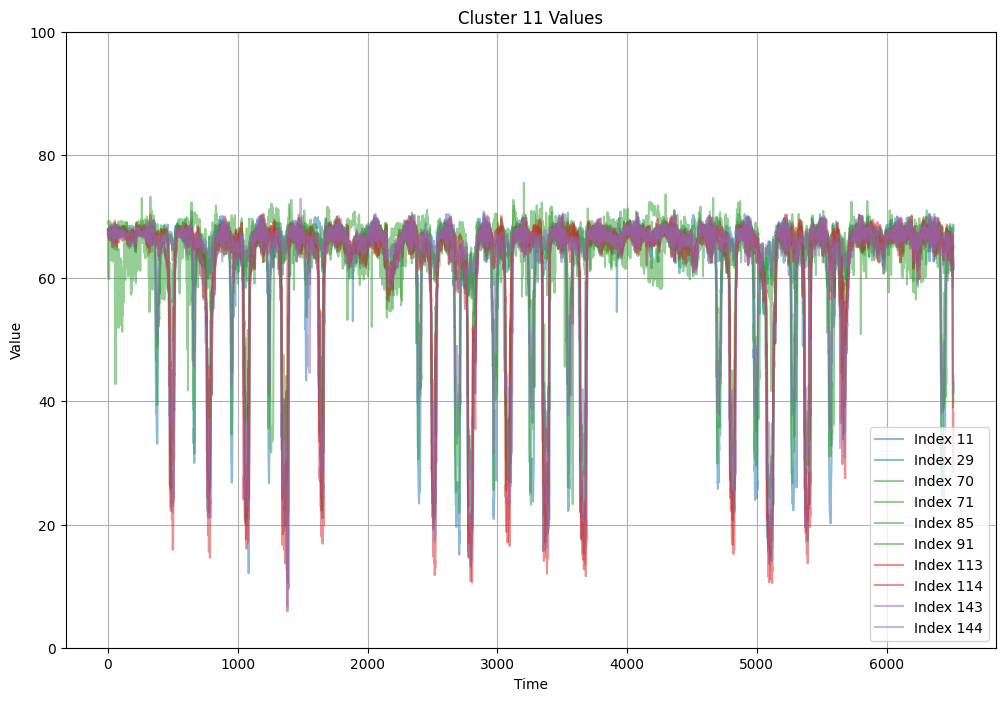

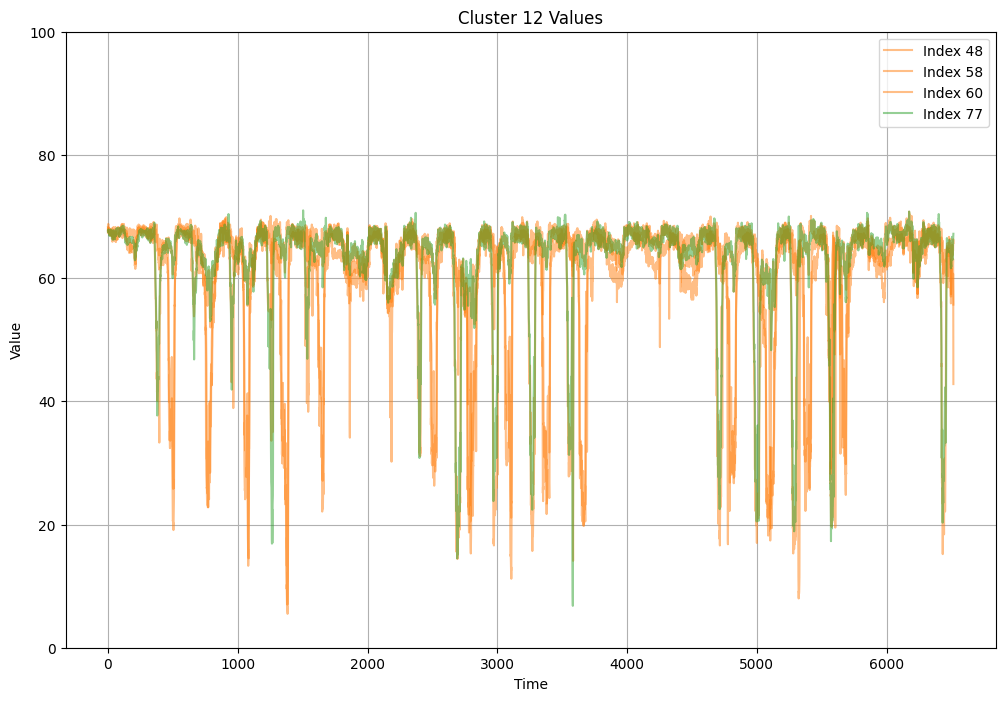

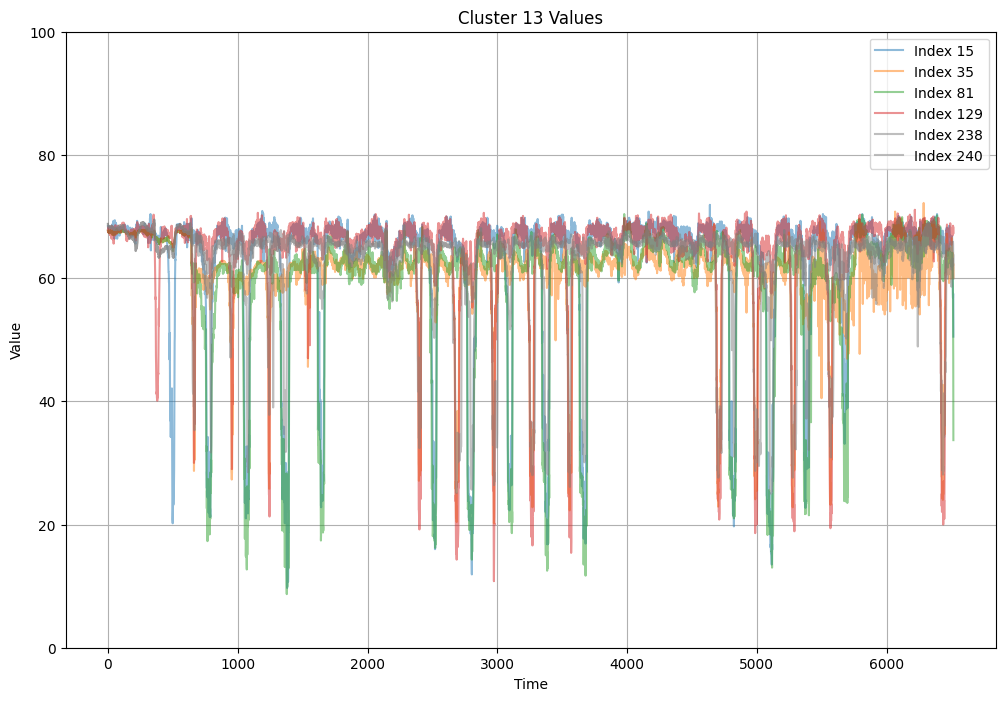

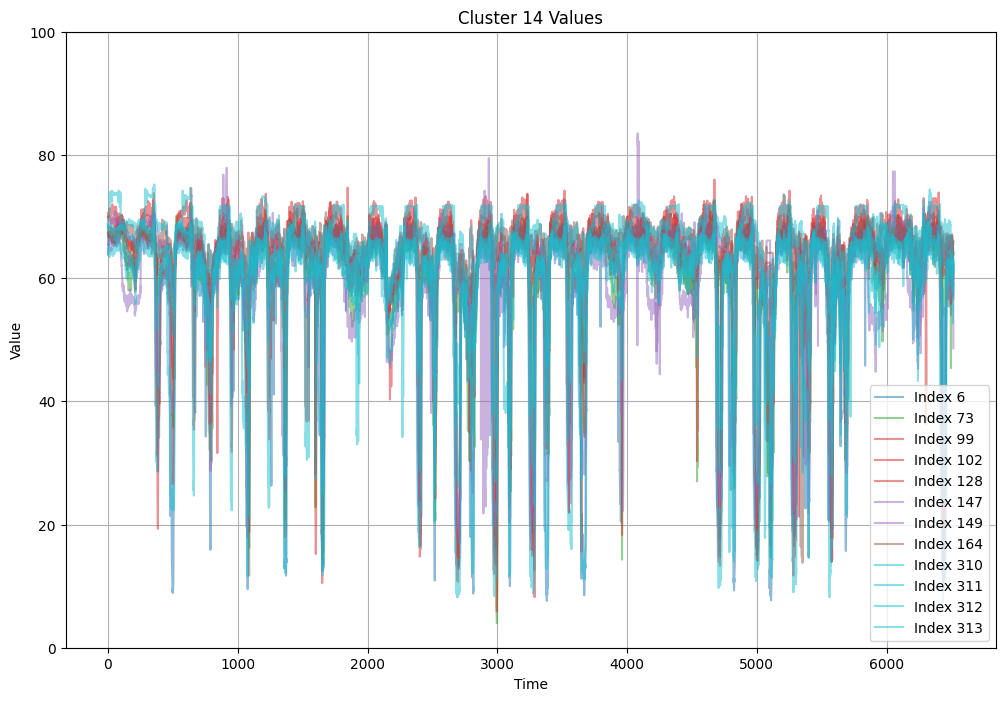

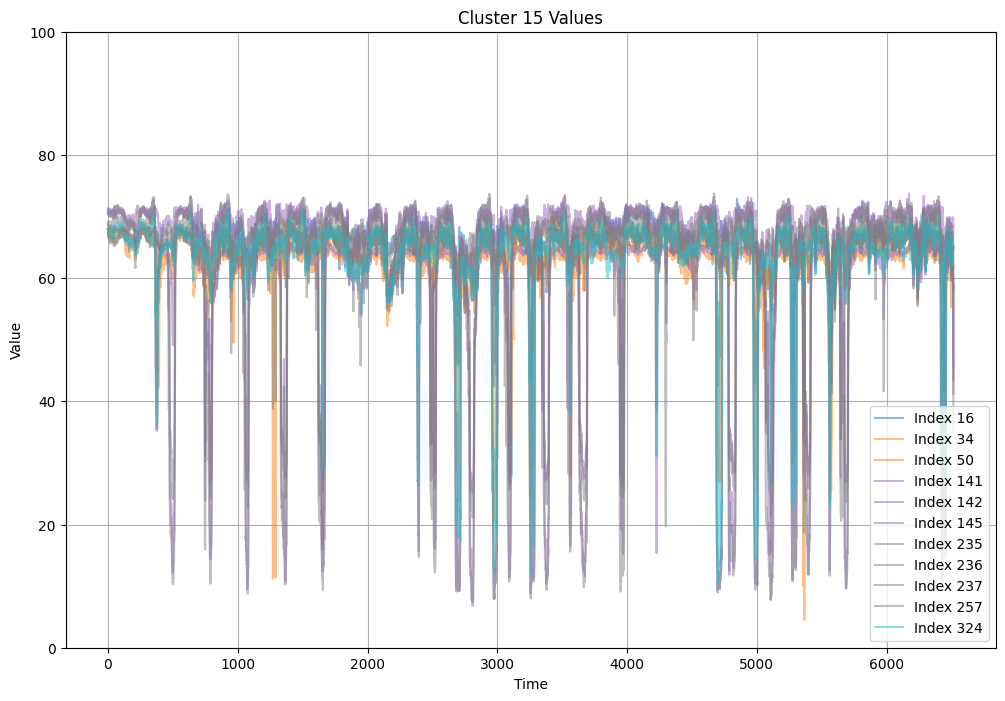

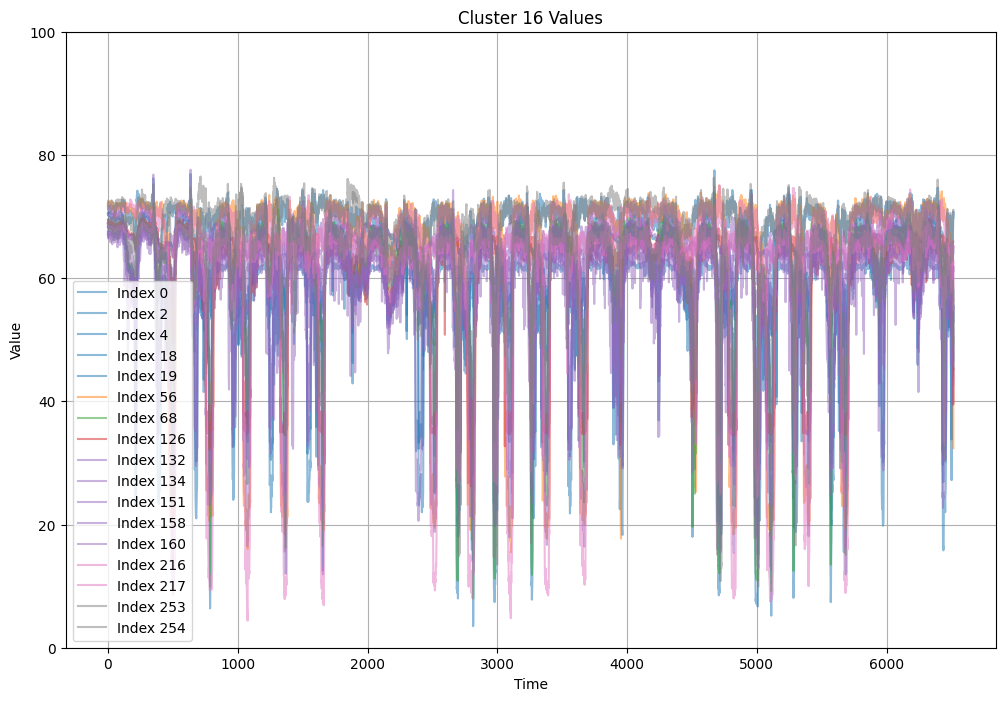

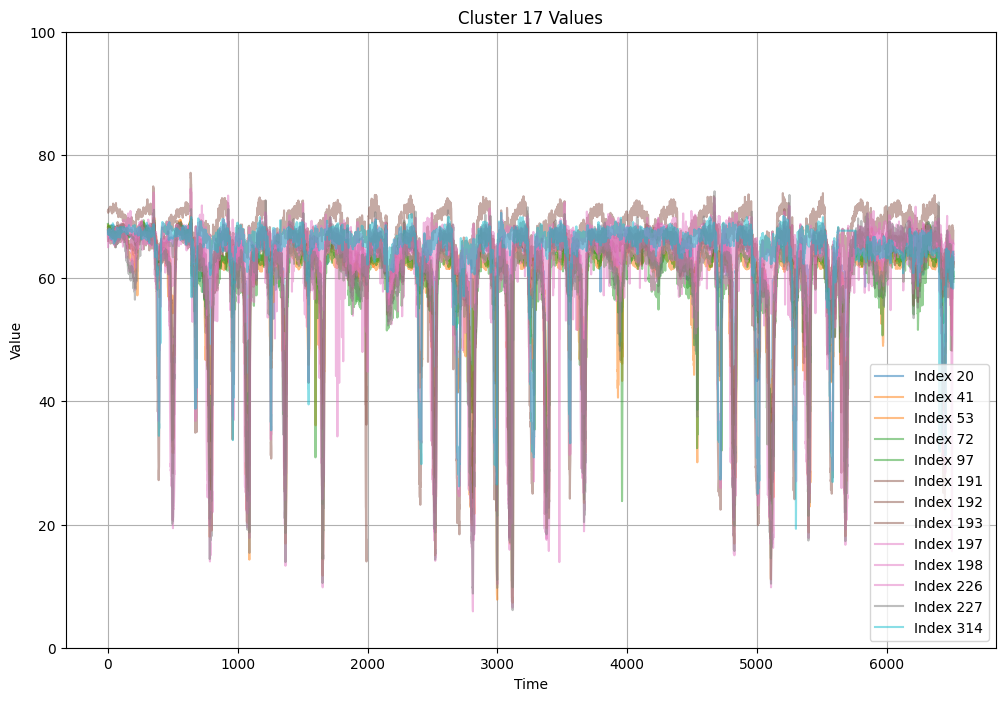

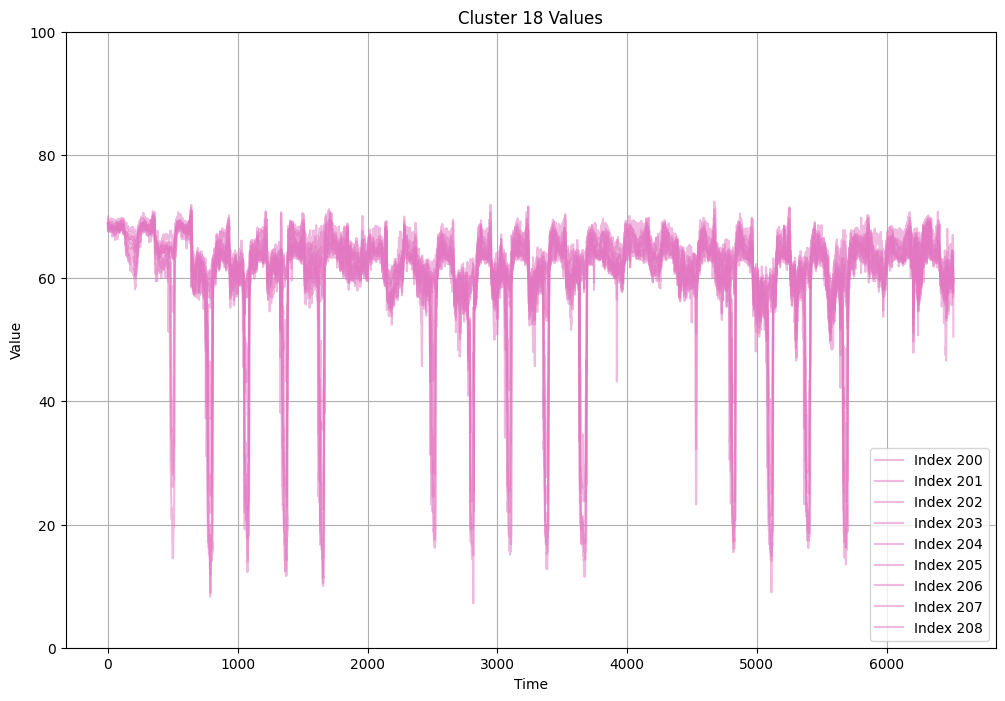

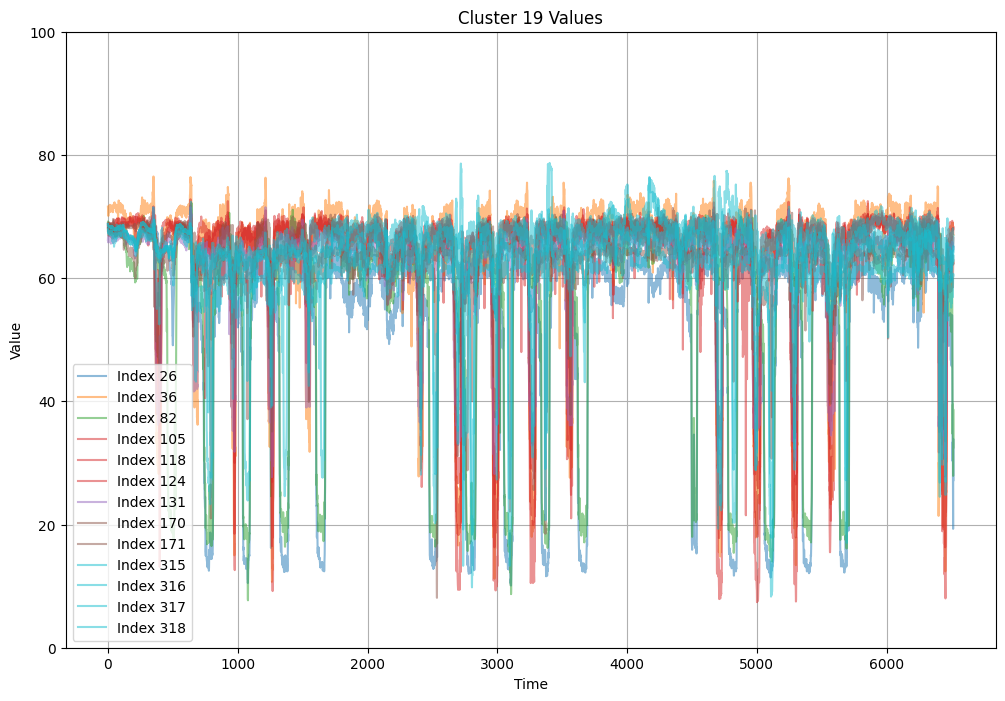

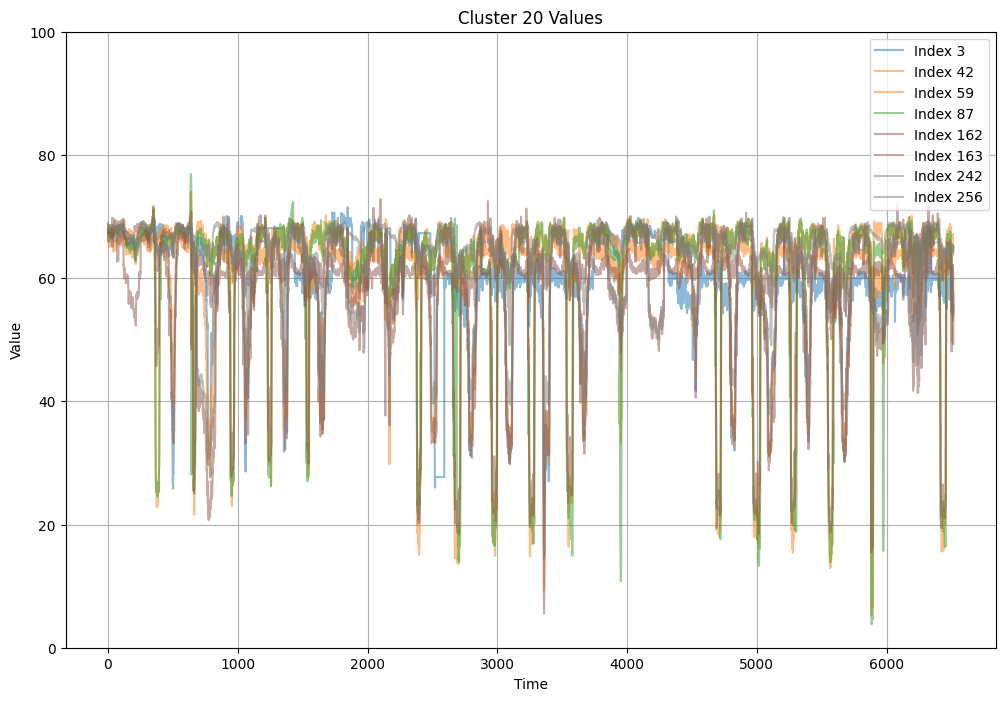

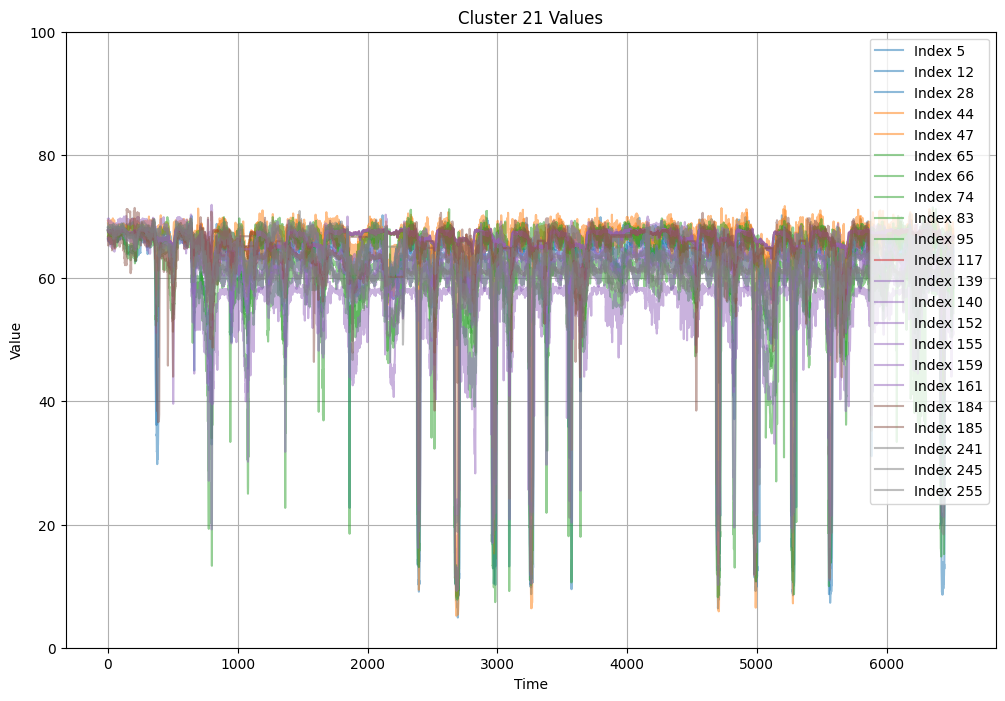

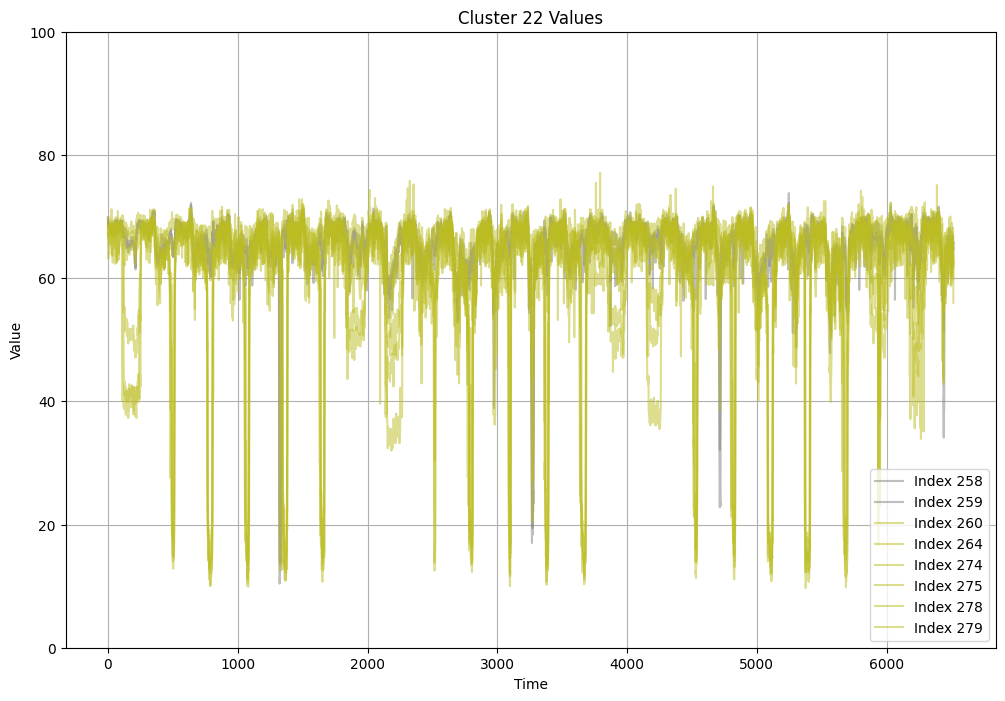

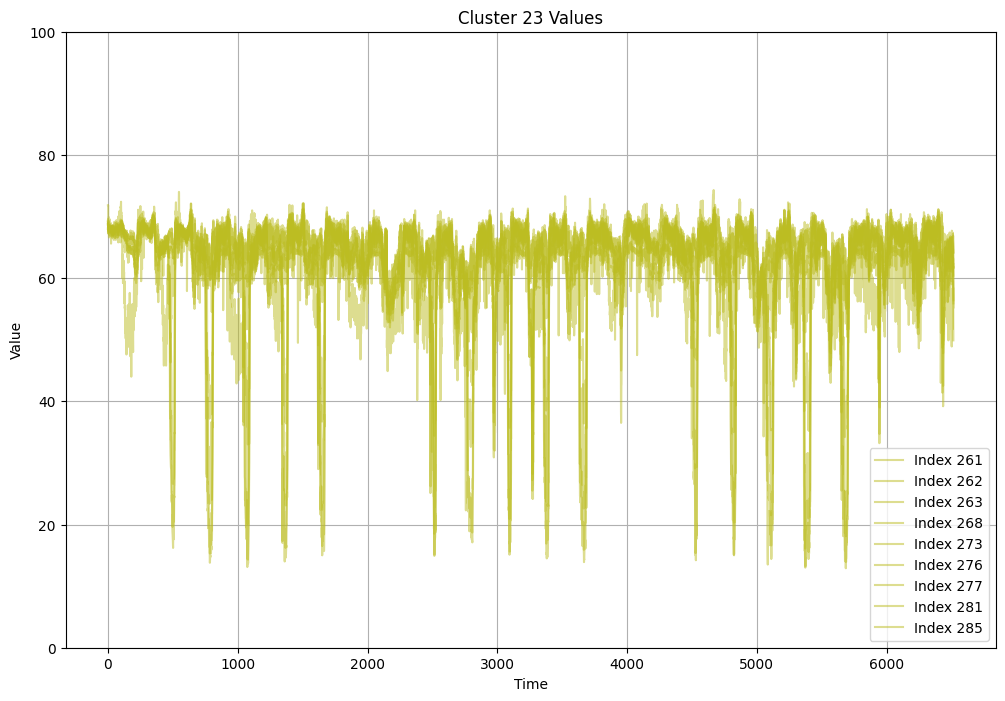

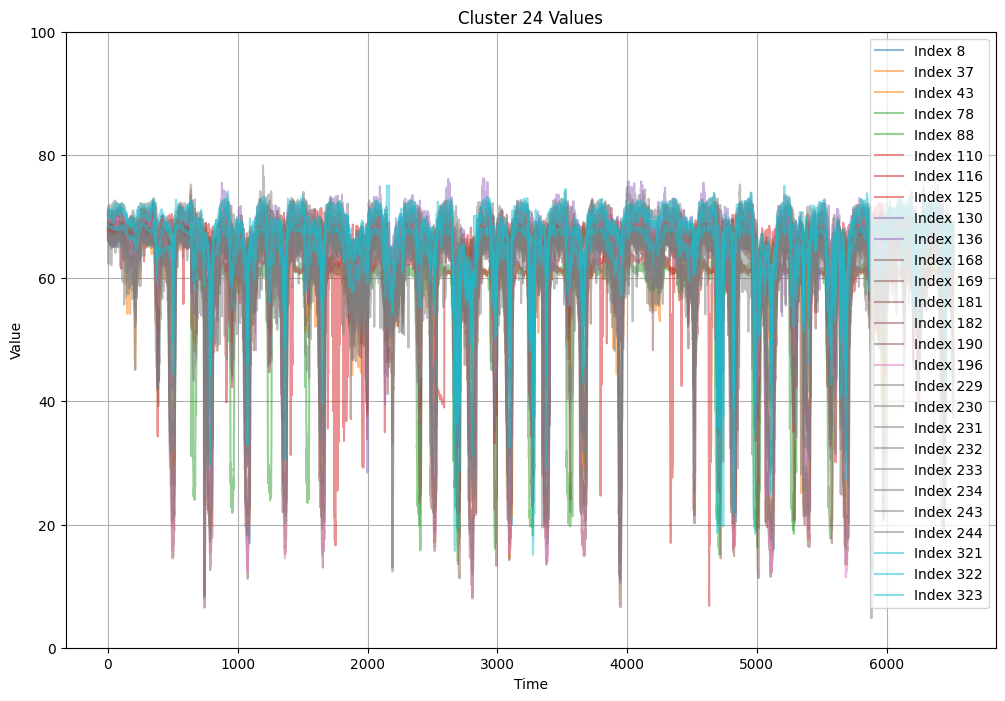

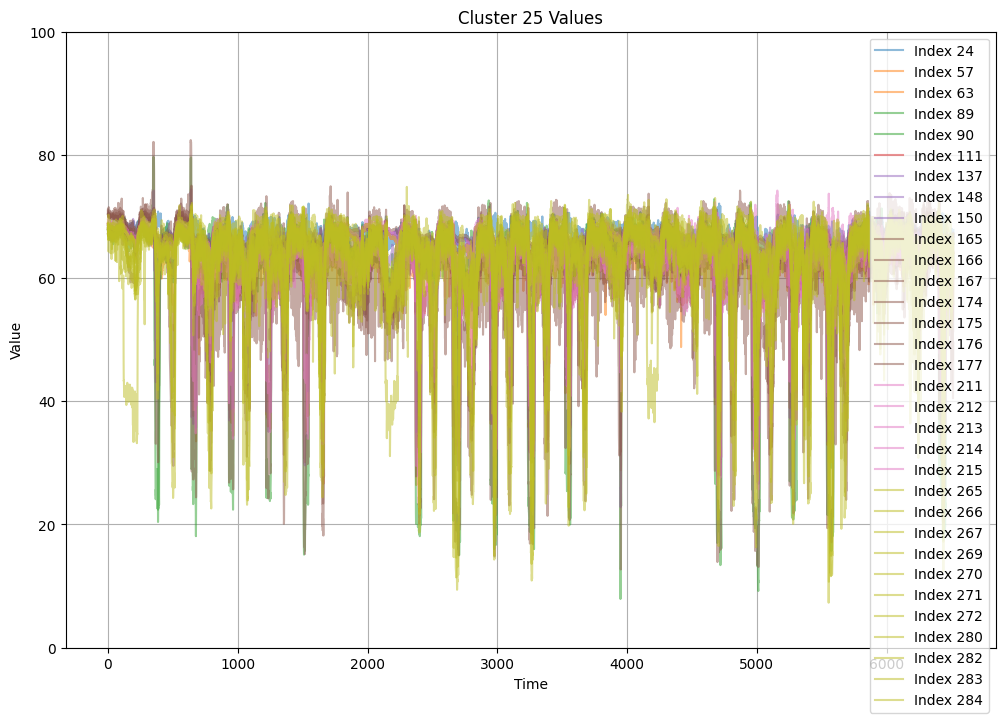

In [12]:
plot_graphs_by_cluster(np.array_split(df, 8)[0], clusters, num_clusters)

In [13]:
df.shape

(52116, 325)

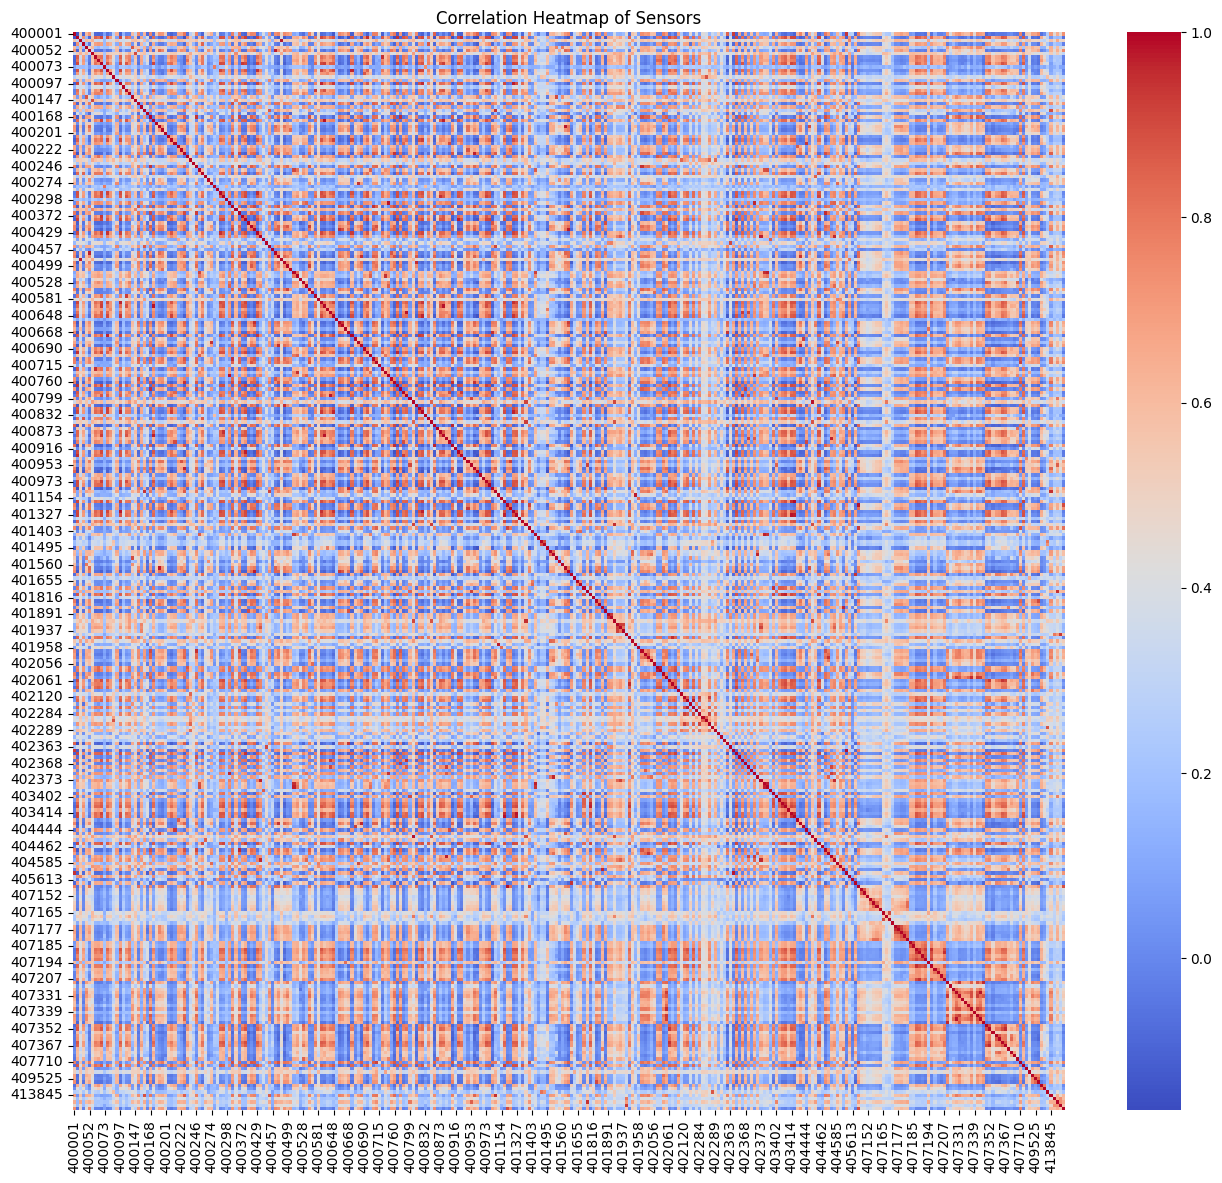

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# センサー毎の相関行列を計算
correlation_matrix = df.corr(method='pearson')

# ヒートマップを描画
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap of Sensors')
plt.show()

/tmp/ipykernel_41199/4083954838.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(indexes))


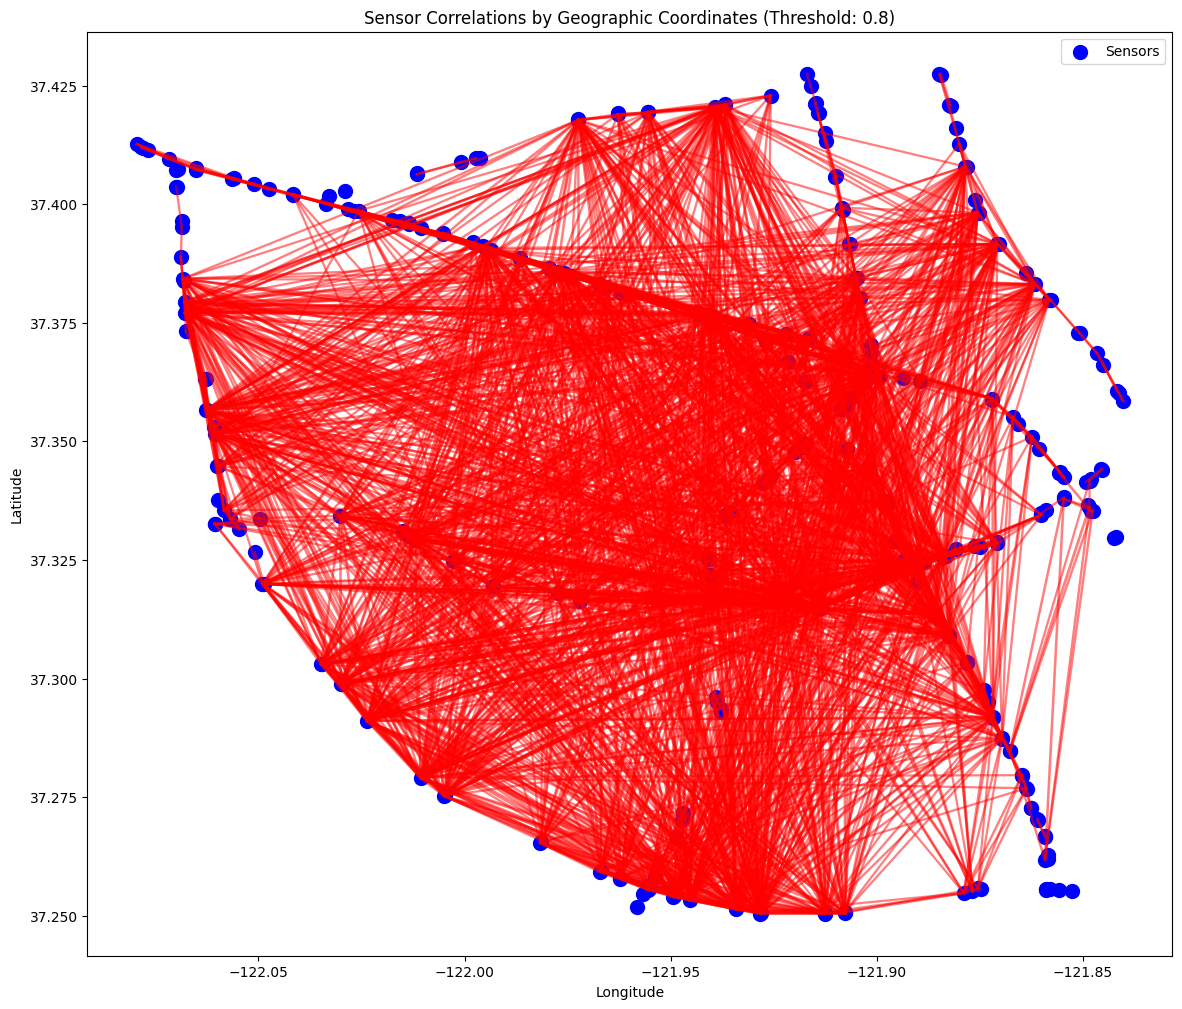

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# センサーの時系列データ (例: センサーごとの測定値を含む列が存在する)

# 閾値を設定して、強い相関のみを可視化（例：|0.7|以上の相関を可視化）
threshold = 0.8
strong_correlations = np.abs(correlation_matrix) > threshold

# 各センサーに対して一意の色を割り当てる
colors = plt.cm.get_cmap('hsv', len(indexes))

# プロットの準備
plt.figure(figsize=(14, 12))

# センサーの位置をプロット
plt.scatter(longitudes, latitudes, s=100, c='blue', label='Sensors')

# 相関が強いセンサー間に線を描画
for i in range(len(indexes)):
    for j in range(i+1, len(indexes)):
        if strong_correlations.iloc[i, j]:
            x_coords = [longitudes.iloc[i], longitudes.iloc[j]]
            y_coords = [latitudes.iloc[i], latitudes.iloc[j]]
            plt.plot(x_coords, y_coords, 'r-', alpha=0.5, lw=2 * correlation_matrix.iloc[i, j])

plt.title(f'Sensor Correlations by Geographic Coordinates (Threshold: {threshold})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [16]:
# from dtaidistance import dtw

# # DTWの距離行列を計算
# dtw_matrix = np.zeros((len(df.columns), len(df.columns)))
# for i, col1 in enumerate(df.columns):
#     for j, col2 in enumerate(df.columns):
#         dtw_matrix[i, j] = dtw.distance(df[col1].values, df[col2].values)

# print("DTW Distance Matrix:\n", dtw_matrix)

In [17]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.fft import fft
from sklearn.metrics import pairwise_distances
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import geopy.distance


In [18]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    緯度・経度の組を受け取り、ハーバサイン距離を計算する。
    """
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)
    return geopy.distance.geodesic(coords_1, coords_2).km


n = len(indexes)
D_s = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        D_s[i, j] = haversine_distance(latitudes.iloc[i], longitudes.iloc[i], latitudes.iloc[j], longitudes.iloc[j])
        D_s[j, i] = D_s[i, j]  # 対称行列


In [19]:
n = len(indexes)
D_t = np.zeros((n, n))
psd_list = []

# 各時系列データのパワースペクトル密度を計算
for idx in range(n):
    psd = np.abs(fft(df.iloc[:, idx].values))**2
    psd_list.append(psd)

# パワースペクトル密度間の距離を計算
for i in range(n):
    for j in range(i + 1, n):
        D_t[i, j] = np.sum(np.abs(psd_list[i] - psd_list[j]))
        D_t[j, i] = D_t[i, j]  # 対称行列

In [20]:
def calculate_combined_distance_matrix(D_s, D_t, alpha=0.5, beta=0.5):
    """
    空間的距離行列 D_s と時間的距離行列 D_t を受け取り、総合距離行列 D を計算する。
    """
    return alpha * D_s + beta * D_t

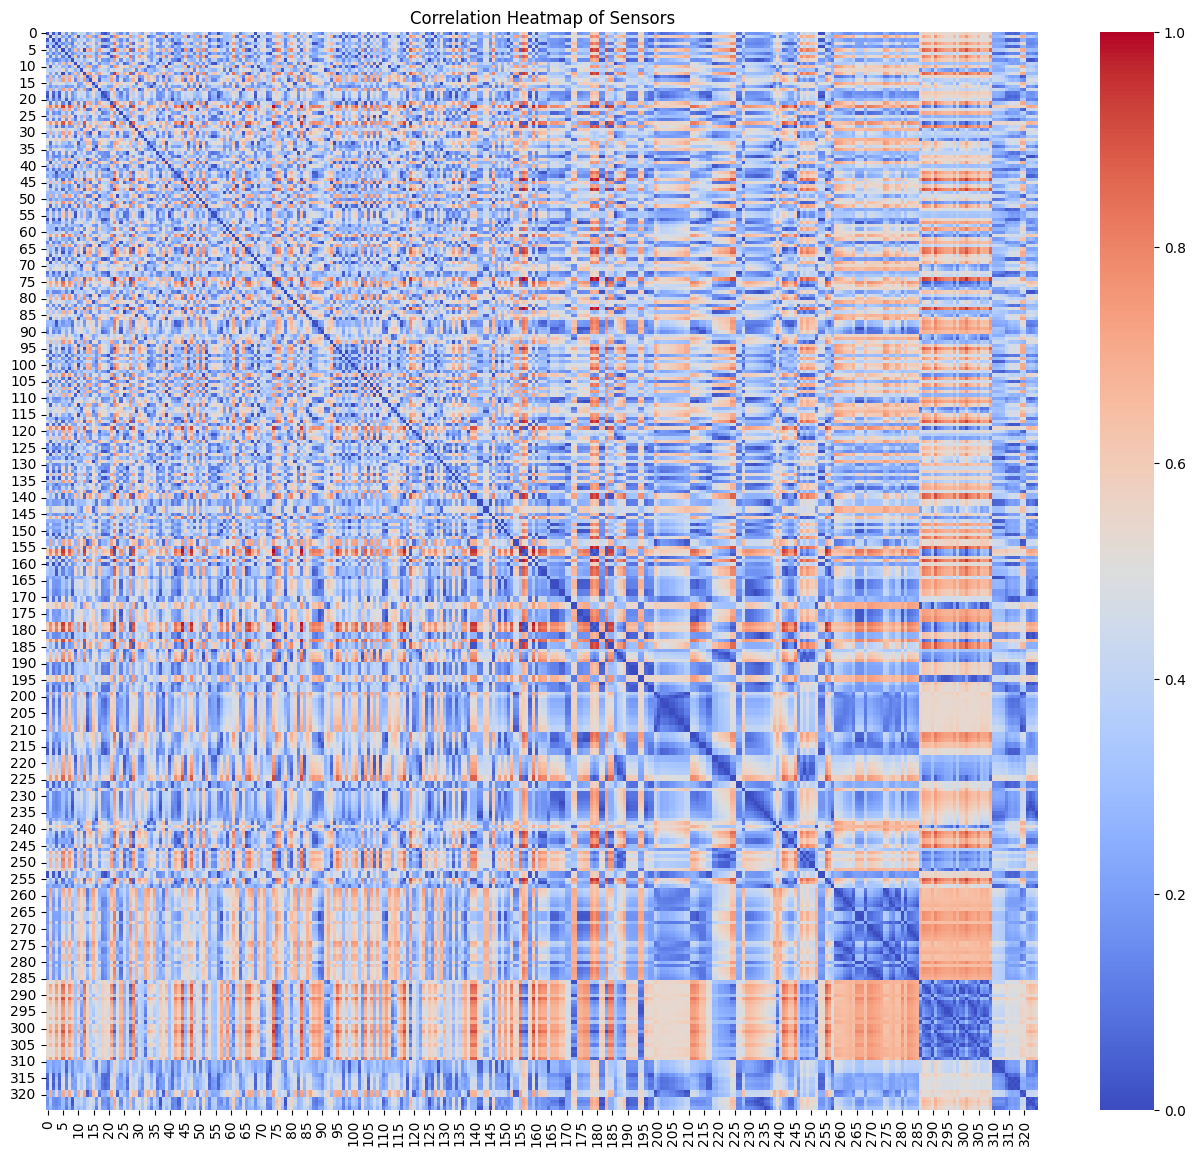

In [21]:
# 総合距離行列の計算
D = calculate_combined_distance_matrix(D_s, D_t, alpha=1.0, beta=0.0)

# センサー毎の相関行列を計算
correlation_matrix = D / D.max()

# ヒートマップを描画
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap of Sensors')
plt.show()

/tmp/ipykernel_41199/2707634126.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(indexes))


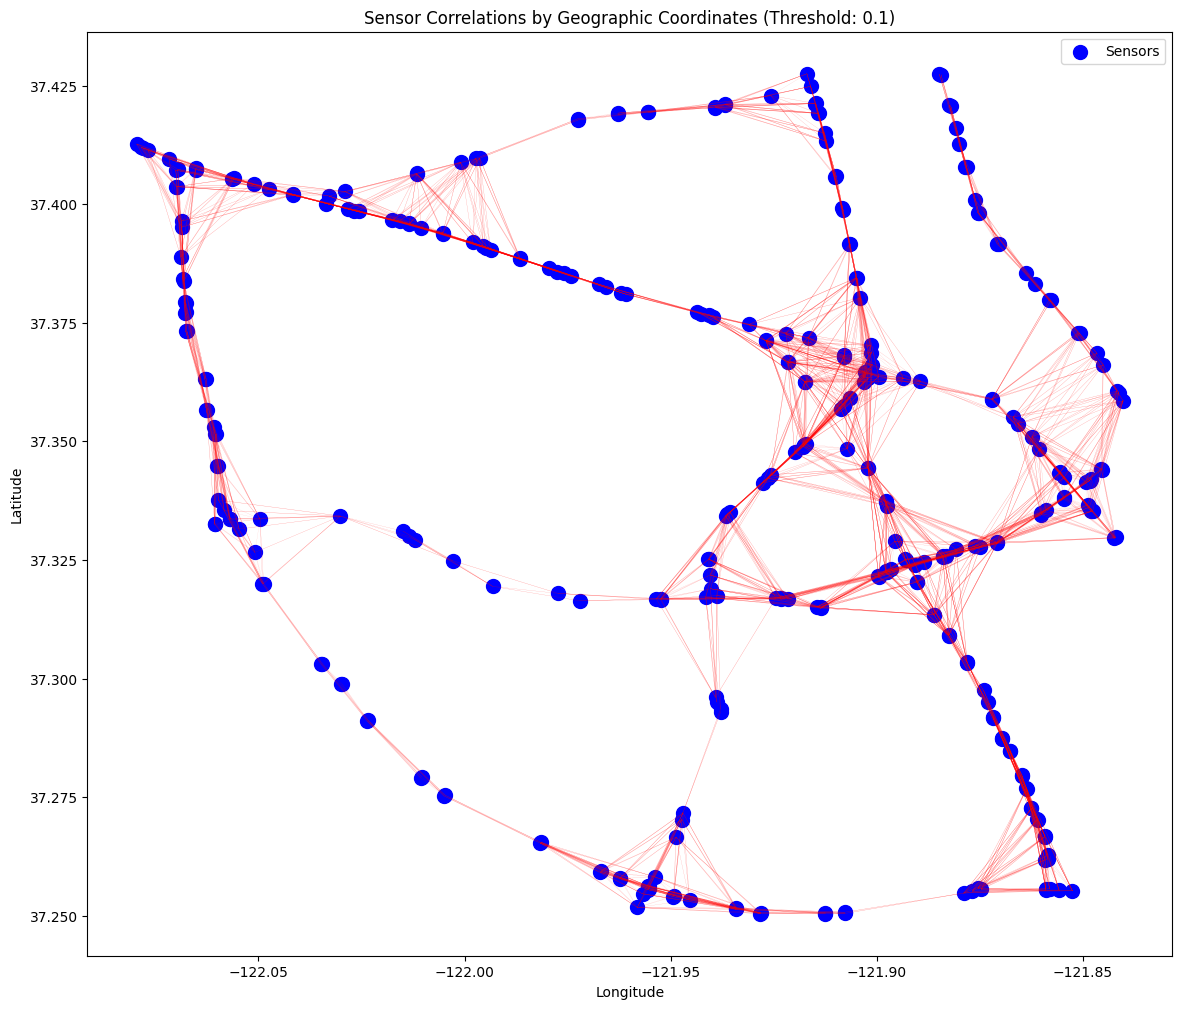

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# センサーの時系列データ (例: センサーごとの測定値を含む列が存在する)

# 閾値を設定して、強い相関のみを可視化（例：|0.7|以上の相関を可視化）
threshold = 0.1
strong_correlations = np.abs(correlation_matrix) < threshold

# 各センサーに対して一意の色を割り当てる
colors = plt.cm.get_cmap('hsv', len(indexes))

# プロットの準備
plt.figure(figsize=(14, 12))

# センサーの位置をプロット
plt.scatter(longitudes, latitudes, s=100, c='blue', label='Sensors')

# 相関が強いセンサー間に線を描画
for i in range(len(indexes)):
    for j in range(i+1, len(indexes)):
        if strong_correlations[i, j]:
            x_coords = [longitudes.iloc[i], longitudes.iloc[j]]
            y_coords = [latitudes.iloc[i], latitudes.iloc[j]]
            plt.plot(x_coords, y_coords, 'r-', alpha=0.5, lw=2 * correlation_matrix[i, j])

plt.title(f'Sensor Correlations by Geographic Coordinates (Threshold: {threshold})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [23]:
from skfuzzy.cluster import cmeans

def fuzzy_c_means_clustering(D, n_clusters):
    """
    総合距離行列 D とクラスタ数 n_clusters を受け取り、FCM によるクラスタリングを行う。
    """
    # Dを2次元データに変換する（行列をベクトル化）
    data = D.reshape((-1, 1))
    
    # FCM クラスタリング
    cntr, u, u0, d, jm, p, fpc = cmeans(
        data.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
    )
    
    # 各データポイントのクラスタ所属度を計算
    labels = np.argmax(u, axis=0)
    
    return labels, u

/tmp/ipykernel_41199/244061221.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')
/tmp/ipykernel_41199/244061221.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)
/tmp/ipykernel_41199/244061221.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(longitudes.iloc[j], latitudes.iloc[j], c=colors(i), label=f'Cluster {i}')


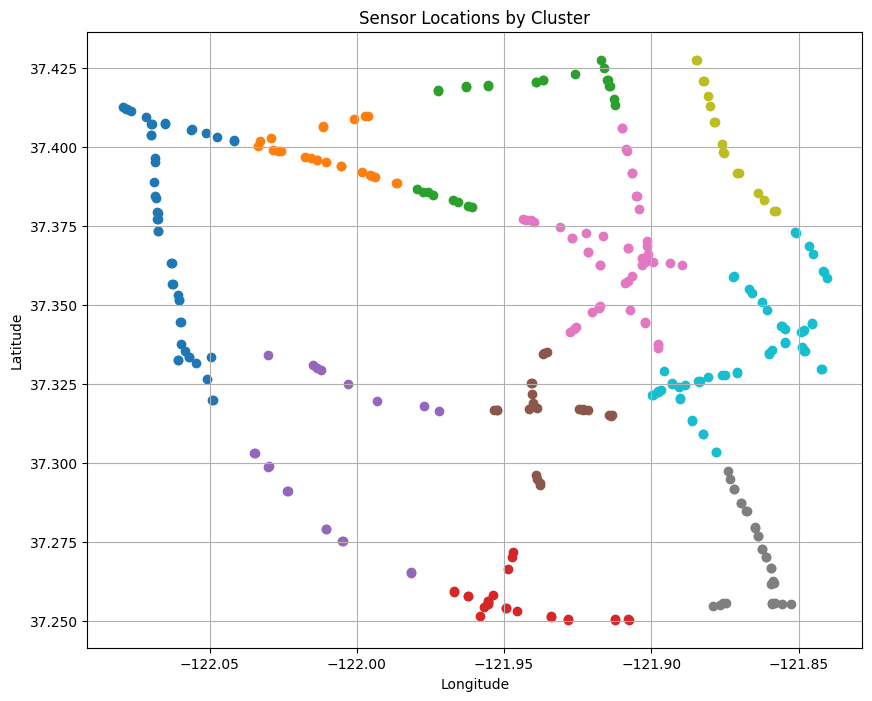

In [24]:
from scipy.cluster.hierarchy import linkage, fcluster

# クラスタリングの実行
# 'ward'法はクラスタ間の分散が最小となるようにクラスタを結合する方法です
Z = linkage(distance_matrix, method='ward')

# クラスタ数を決定 (例: 2クラスタ)
num_clusters = 10
clusters = fcluster(Z, num_clusters, criterion='maxclust')

colors = plt.cm.get_cmap('tab10', num_clusters)

# クラスタごとにセンサーの位置をプロット
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_indices = np.where(clusters == i + 1)[0]
    for j in cluster_indices:
        plt.scatter(longitudes.iloc[j], latitudes.iloc[j], c=colors(i), label=f'Cluster {i}')

plt.title("Sensor Locations by Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()